For this exercise I use the data set `neiss` (**National Electronic Injury Surveillance System**) using an R Package that provides exactly this data set: https://github.com/hadley/neiss. For plotting I use `ggplot2`.

In [2]:
library(neiss)
library(ggplot2)
library(cluster)

# Data overview

It includes 3 datasets:
- injuries
- products
- population
Let us have a look at them:

In [3]:
head(injuries)

,case_num,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative
1,90101432,2009-01-01,61,15.3491,V,5,Male,Other / Mixed Race,hispanic,"Strain, Sprain",NA,Neck,Released,Home,No fire/flame/smoke,1807,NA,5 YOM ROLLING ON FLOOR DOING A SOMERSAULT AND SUSTAINED A CERVICAL STRA IN
2,90101434,2009-01-01,61,15.3491,V,51,Male,White,NA,Contusion Or Abrasion,NA,Eyeball,Released,Home,No fire/flame/smoke,899,NA,"51 YOM C/O PAIN AND IRRITATION TO RIGHT EYE, HAD BEEN GRINDING METAL AT HOME AND POSSIBLY THE CAUSE, FOUND TO HAVE METAL IN EYE, CORNEAL ABRAS"
3,90101435,2009-01-01,61,15.3491,V,2,Female,White,NA,Laceration,NA,Face,Released,Home,No fire/flame/smoke,4057,NA,2 YOF WAS RUNNING THROUGH HOUSE AND FELL INTO CORNER OF TABLE SUSTAININ G A LACERATION TO FACE NEAR INSIDE CORNER OF RIGHT EYE ALONGSIDE NOSE
4,90101436,2009-01-01,61,15.3491,V,20,Male,White,NA,Contusion Or Abrasion,NA,Toe,Released,Home,No fire/flame/smoke,1884,NA,"20 YOM PUNCHED AND KICKED A WALL D/T DRINKING TOO MUCH LAST NIGHT, SUST AINED CONTUSIONS AND ABRASIONS TO RIGHT MIDDLE TOE, RIGHT HAND"
5,90101437,2009-01-01,61,15.3491,V,20,Male,White,NA,Fracture,NA,Wrist,Released,Sports Or Recreation Place,No fire/flame/smoke,3283,NA,20 YOM FELL SNOW SKIING SUSTAINING A FRACTURED WRIST
6,90101438,2009-01-01,61,15.3491,V,47,Female,Other / Mixed Race,asian,Fracture,NA,Knee,Released,Sports Or Recreation Place,No fire/flame/smoke,3283,NA,47 YOF FELL SNOW SKIING SUSTAINING A FRACTURED KNEE


In [5]:
head(products)

,code,title
1,101,washing machines without wringers or oth
2,102,wringer washing machines
3,103,washing machines with unheated spin drye
4,106,electric clothes dryers without washers
5,107,gas clothes dryers without washers
6,108,mangle irons


In [7]:
head(population)

,year,age,sex,n
1,2000,0,female,1881822
2,2000,0,male,1974134
3,2000,1,female,1856084
4,2000,1,male,1942607
5,2000,2,female,1856028
6,2000,2,male,1944116


In the dataset `injuries` I don't yet know what the columns **psu** and **stratum** are.

# Visualisations

First let's have a look at some plots to get some more insight in the data.

To be able to have sorted bars, we need to sort the table first.

In [6]:
injuries <- within(injuries, body_part <- factor(body_part, levels=names(sort(table(body_part)))))

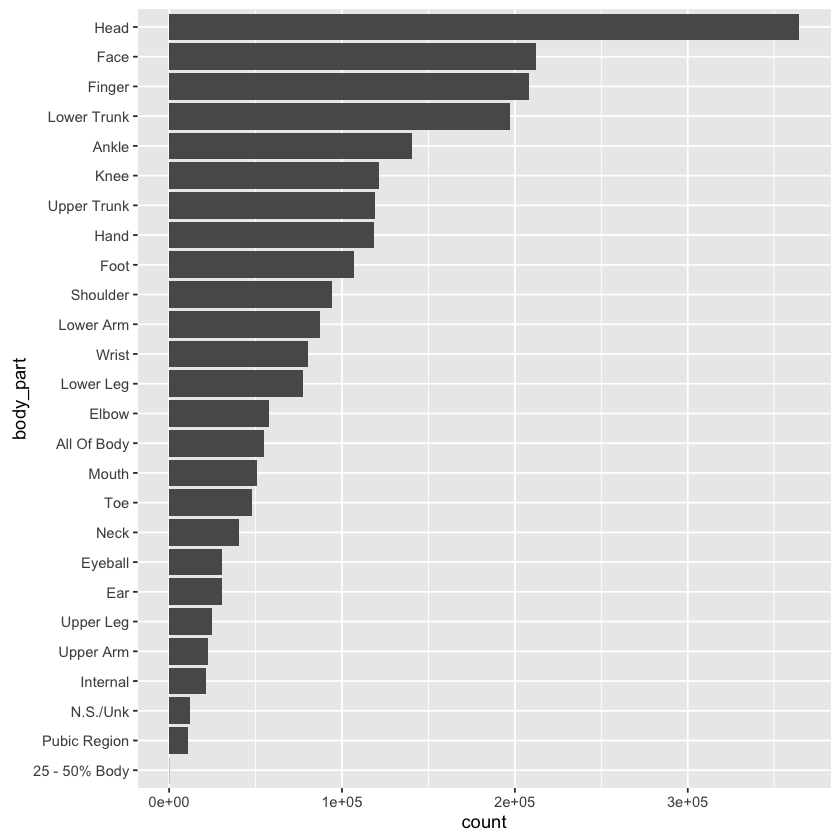

In [7]:
ggplot(injuries) + geom_bar(aes(x=body_part)) + coord_flip()

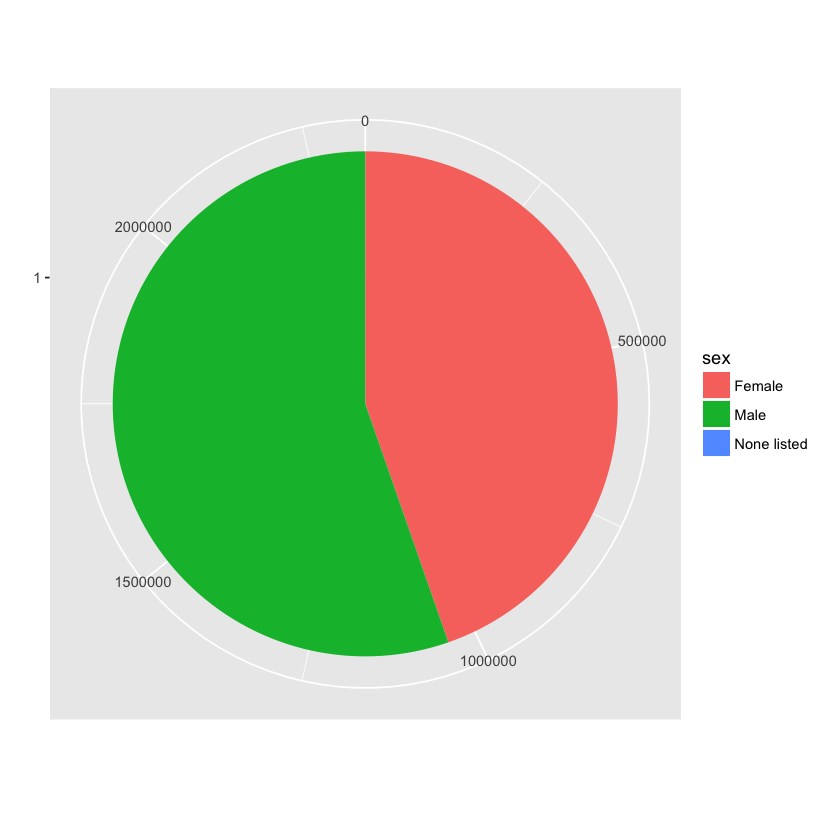

In [9]:
ggplot(injuries, aes(x = factor(1), fill = sex)) + geom_bar(width = 1) + coord_polar(theta = "y") + ylab("") + xlab("")

In [8]:
table(injuries$sex)


     Female        Male None listed 
    1041949     1290919          89 

In [9]:
body_parts_10 <- tail(levels(injuries$body_part),10) # they were sorted before

In [10]:
body_parts_10

[1] "Shoulder"    "Foot"        "Hand"        "Upper Trunk" "Knee"       
 [6] "Ankle"       "Lower Trunk" "Finger"      "Face"        "Head"

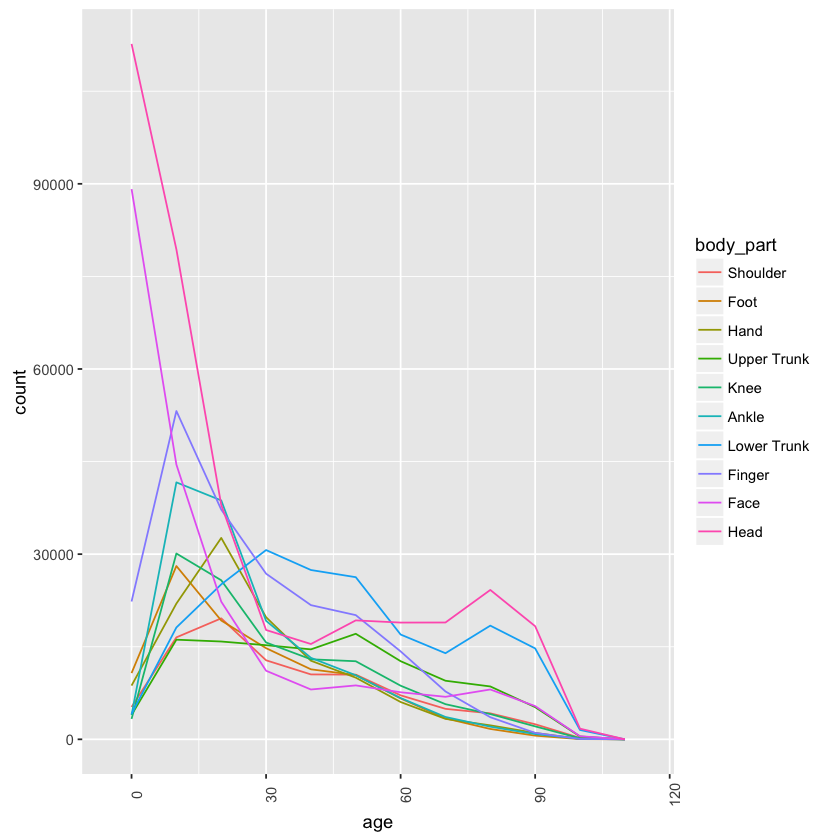

In [75]:
ggplot(injuries[injuries$body_part %in% body_parts_10,]) + geom_line(aes(x=age, y=..count.., col=body_part), stat="bin", binwidth=10) + 
theme(axis.text.x = element_text(angle = 90))

It looks like injuries to the face and head are very common among young people. At the age of about 25 these two body parts are succeeded by fingers and lower trunk. From the age of around 60 injuries to the head are again the most common.

# Clustering

In [11]:
subset <- sample(1:nrow(injuries), 300, replace=FALSE)

Many columns are still characters and need to be converted to factors before we can apply `daisy` (which will compute dissimilarities).

In [7]:
factor_cols <- c("stratum", "sex", "race", "race_other","diag", "diag_other", "disposition", "location", "fmv", "narrative", "prod1", "prod2") # prod1 and prod2 because they should not be treated like numbers

In [8]:
injuries[,factor_cols] <- lapply(injuries[,factor_cols], function(x) as.factor(x))

In [14]:
str(injuries)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2332957 obs. of  18 variables:
 $ case_num   : int  90101432 90101434 90101435 90101436 90101437 90101438 90101439 90101441 90101442 90101446 ...
 $ trmt_date  : Date, format: "2009-01-01" "2009-01-01" ...
 $ psu        : num  61 61 61 61 61 61 61 61 61 61 ...
 $ weight     : num  15.3 15.3 15.3 15.3 15.3 ...
 $ stratum    : Factor w/ 5 levels "C","L","M","S",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ age        : num  5 51 2 20 20 47 12 21 56 2 ...
 $ sex        : Factor w/ 3 levels "Female","Male",..: 2 2 1 2 2 1 2 1 2 2 ...
 $ race       : Factor w/ 7 levels "American Indian/Alaska Native",..: 6 7 7 7 7 6 3 3 6 3 ...
 $ race_other : Factor w/ 465 levels "?",".","`","`hisp",..: 191 NA NA NA NA 49 NA NA 436 NA ...
 $ diag       : Factor w/ 30 levels "Amputation","Anoxia",..: 29 12 24 12 19 19 26 29 19 24 ...
 $ diag_other : Factor w/ 18285 levels ",not stated",..: NA NA NA NA NA NA 12612 NA NA NA ...
 $ body_part  : Factor w/ 26 levels "25 - 50% Body",..:

In [5]:
features <- c("weight", "age", "race", "race_other", "diag", "diag_other", "body_part", "disposition", "location", "fmv", "prod1", "prod2","narrative")

In [77]:
diss <- daisy(injuries[subset,features])

In [78]:
summary(diss)

44850 dissimilarities, summarized :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.11903 0.52345 0.59700 0.59093 0.66467 0.89305 
Metric :  mixed ;  Types = I, I, N, N, N, N, N, N, N, N, N, N, N 
Number of objects : 300

In [79]:
a <- agnes(diss, diss=TRUE)

In [80]:
summary(a)

Object of class 'agnes' from call:
 agnes(x = diss, diss = TRUE) 
Agglomerative coefficient:  0.5524608 
Order of objects:
  [1] 81027   1887949 193087  2256996 439093  1545411 680750  2287245 945750 
 [10] 1487681 1494972 501033  2194101 1137292 756951  1181673 576528  2133173
 [19] 632693  195406  6149    1467899 493181  86734   577001  181651  1968358
 [28] 1511425 1901692 1232238 1290239 1080505 600158  1770309 1240094 2305284
 [37] 389830  675139  747537  2304179 1703691 1804084 2138841 752819  911943 
 [46] 102644  510934  438256  1336190 1292477 2187508 338189  433288  1000513
 [55] 1186604 1558325 2282120 1881006 1667048 348868  389413  508955  226994 
 [64] 320181  730255  762216  2074399 1779504 1496187 1437219 440491  287722 
 [73] 217550  318111  738065  381947  1649693 1835857 77173   97258   2218196
 [82] 649941  829121  1982681 2020089 1510508 1049174 1010642 448104  1763041
 [91] 1419046 1233577 1849299 153619  330836  1642787 367528  1920575 2217153
[100] 1544027 19716

Ok so this does not tell me much.

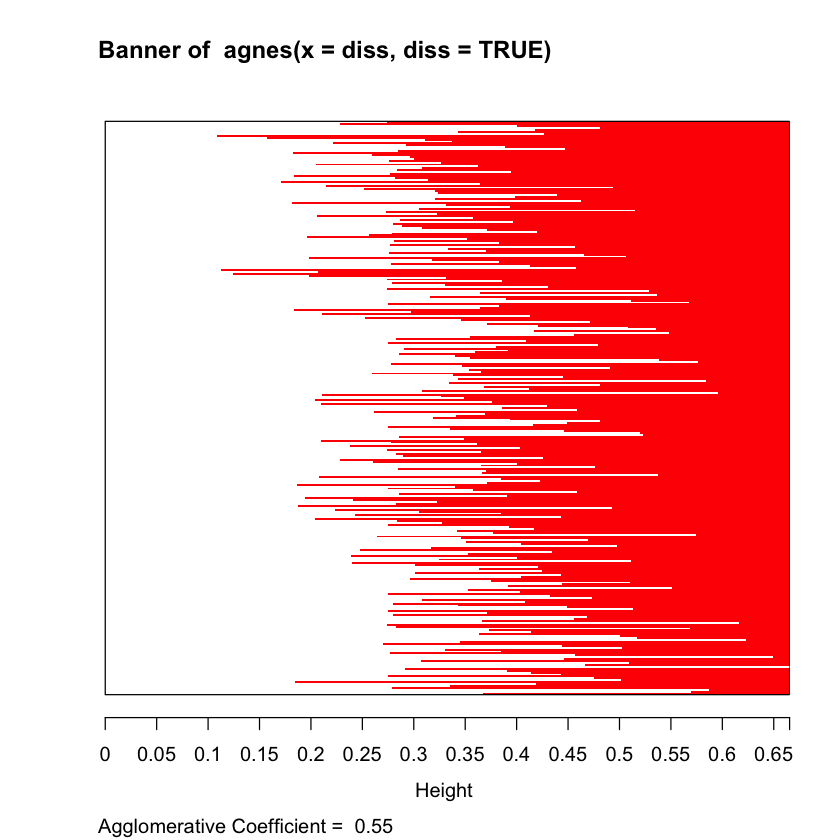

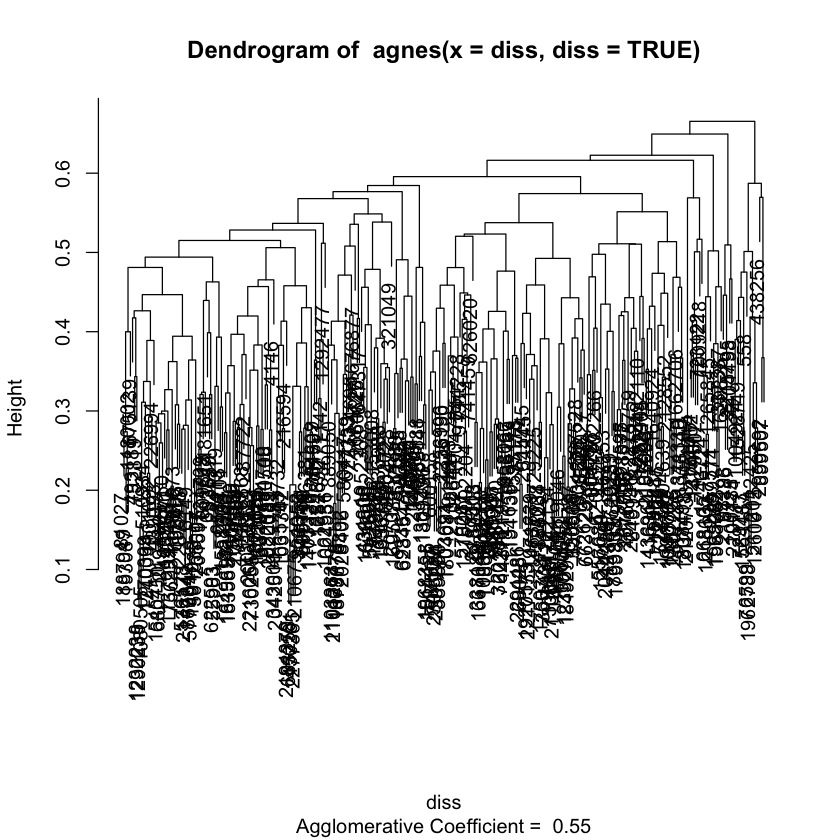

In [71]:
plot(a)

The plots neither.

# Injury patterns wrt sex of the patient

You might have noticed that I did not use **sex** as a feature in my first try.

In [3]:
subset <- sample(1:nrow(injuries), 10000, replace=FALSE)

In [ ]:
str(injuries[subset,features])

In [9]:
diss <- daisy(injuries[subset,features])

Warning message:
In data.matrix(x): NAs introduced by coercionWarning message:
In min(x): no non-missing arguments to min; returning InfWarning message:
In max(x): no non-missing arguments to max; returning -Inf

ERROR: Error in daisy(injuries[subset, features]): invalid type character for column numbers 7


In [ ]:
a <- agnes(diss, diss=TRUE)

In [1]:
p <- pam(diss, diss=TRUE, k = 2)

ERROR: Error in eval(expr, envir, enclos): could not find function "pam"
